We aim to sample from the distribution defined by the function $ \pi_\alpha(x) $ using the Metropolis-Hastings algorithm. This method allows us to generate samples according to the probability density function
leveraging the Metropolis-Hastings algorithm for proposing new samples.

$ \pi_\alpha(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \left(1 + \sin(\alpha x)\right) $

where $\alpha $ is a parameter that you can adjust to see how it affects the function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

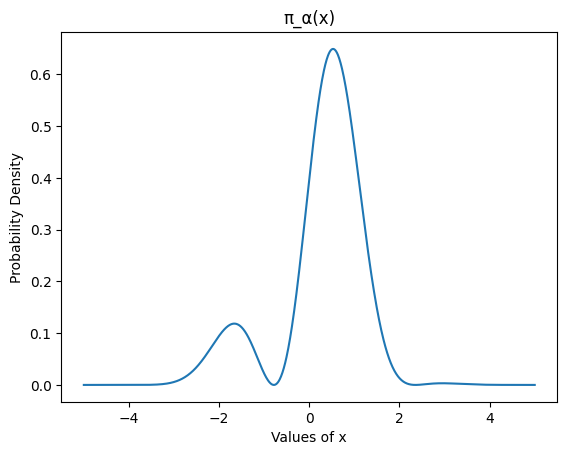

In [1]:
x = np.linspace(-5, 5, 1000)
α = 2
π_α = (1/np.sqrt(2*np.pi))*np.exp((-x**2)/2)*(1+np.sin(α*x))

plt.plot(x, π_α)
plt.title('π_α(x)')
plt.xlabel('Values of x')
plt.ylabel('Probability Density')
plt.show()

In [2]:
# Probability density function π_alpha
def π_α(x, α=2):
    return (1/np.sqrt(2*np.pi))*np.exp((-x**2)/2)*(1+np.sin(α*x))

# Probability density function for a normal distribution
def Q_normal(mu, x, sigma=1):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Probability density function for a t-distribution
def Q(df, x):
    return t.pdf(x, df)

# **Metropolis-Hastings.**

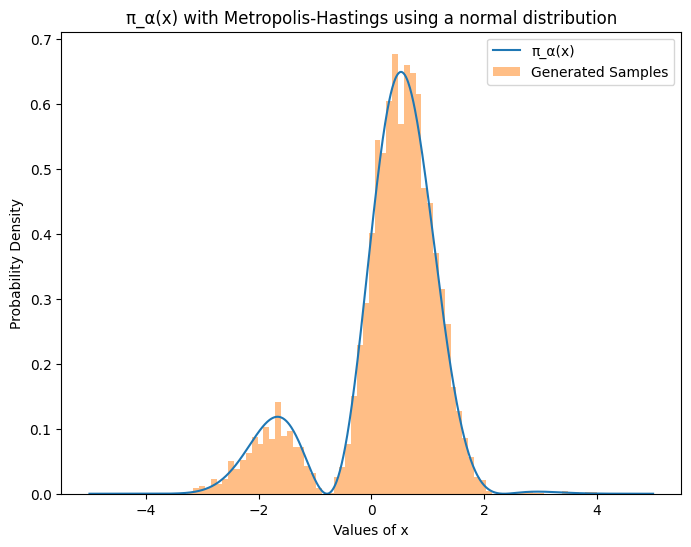

In [3]:
# Metropolis-Hastings algorithm for normal distribution
def metropolis_hastings(iterations, α=2):
    samples = []
    x = 0  # Initialization with a random value
    for i in range(iterations):
        x_new = x + np.random.normal(0, 1)  # Propose a new sample
        acceptance_ratio = min(1, (π_α(x_new, α) * Q_normal(x_new, x)) / (π_α(x, α) * Q_normal(x, x_new)))
        if np.random.uniform(0, 1) < acceptance_ratio:
            x = x_new  # Accept the proposal
        samples.append(x)
    return np.array(samples)

# Number of iterations for the algorithm
num_iterations = 10000

# Sampling with Metropolis-Hastings
samples = metropolis_hastings(num_iterations)

# Plotting the samples
plt.figure(figsize=(8, 6))
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, π_α(x_values), label='π_α(x)')
plt.hist(samples, bins=70, density=True, alpha=0.5, label='Generated Samples')
plt.title('π_α(x) with Metropolis-Hastings using a normal distribution')
plt.xlabel('Values of x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# **Rejection sampling.**

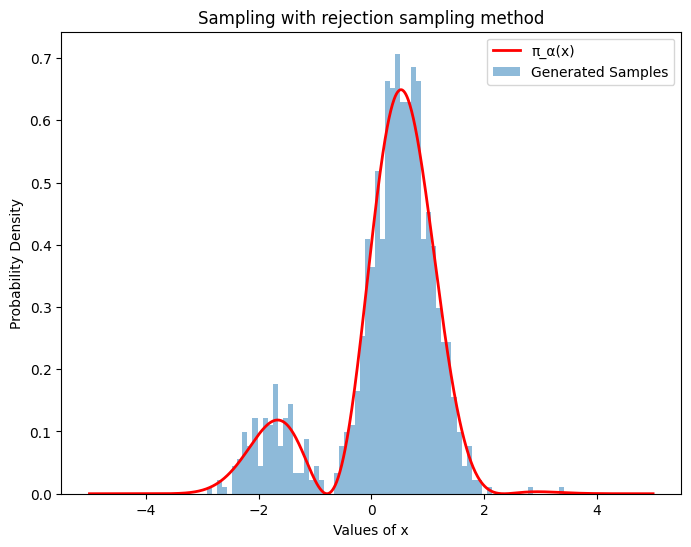

In [4]:
# Density of the standard normal distribution N(0,1)
def normal_density(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2)

# Probability density function π_alpha
def π_α(x, α=2):
    return (1/np.sqrt(2*np.pi)) * np.exp((-x**2)/2) * (1 + np.sin(α*x))

# Generating samples using rejection sampling
def rejection_sampling(num_samples):
    samples = []
    while len(samples) < num_samples:
        x_candidate = np.random.normal(0, 1)  # Generate a sample from the normal distribution
        u = np.random.uniform(0, 1)
        if u <= π_α(x_candidate) / (2 * normal_density(x_candidate)):  # Check the rejection condition
            samples.append(x_candidate)
    return np.array(samples)

# Number of samples to generate
num_samples = 1000

# Generate samples using rejection sampling
samples = rejection_sampling(num_samples)

# Plot the generated samples
plt.figure(figsize=(8, 6))
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, π_α(x_values), label='π_α(x)', color='red', linewidth=2)
plt.hist(samples, bins=70, density=True, alpha=0.5, label='Generated Samples')
plt.title('Sampling with rejection sampling method')
plt.xlabel('Values of x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# **Comparaison**

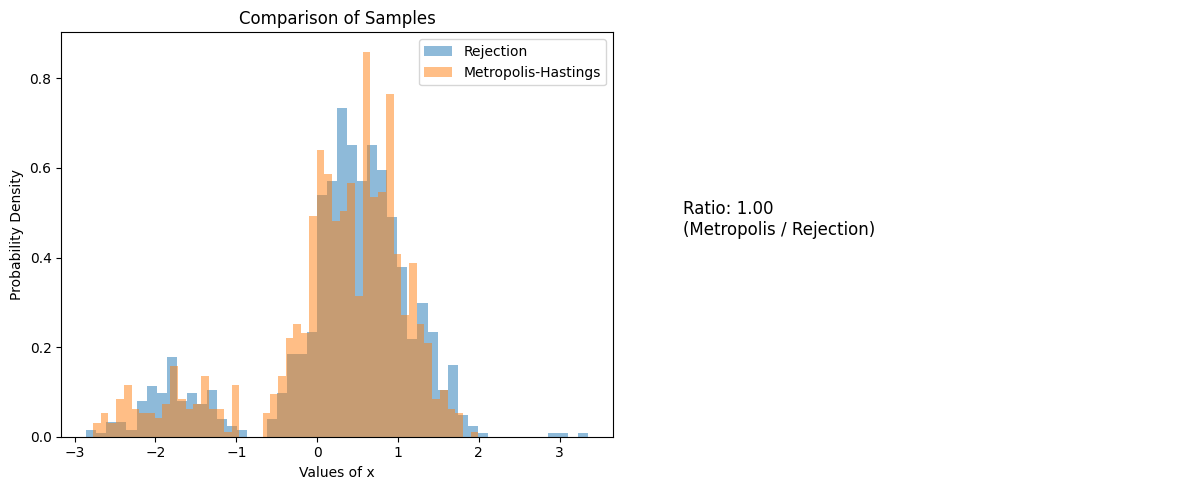

In [5]:
# Number of samples to generate
num_samples_rejection = 1000
num_samples_metropolis = 1000

# Generate samples using rejection sampling and Metropolis-Hastings
samples_rejection = rejection_sampling(num_samples_rejection)
samples_metropolis = metropolis_hastings(num_samples_metropolis)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(samples_rejection, bins=50, density=True, alpha=0.5, label='Rejection')
plt.hist(samples_metropolis, bins=50, density=True, alpha=0.5, label='Metropolis-Hastings')
plt.title('Comparison of Samples')
plt.xlabel('Values of x')
plt.ylabel('Probability Density')
plt.legend()

# Calculate the ratio between sample sizes
ratio = len(samples_metropolis) / len(samples_rejection)

plt.subplot(1, 2, 2)
plt.text(0.1, 0.5, f"Ratio: {ratio:.2f}\n(Metropolis / Rejection)", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()